In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1GMD0hRhBxviRCP0TGNtHtmio3xDOAkHG'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train.csv')

In [33]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Analizamos la columna **Keyword**

In [34]:
keywords=tweets['keyword']
keywords.value_counts()
print(tweets['keyword'].isna().sum())

61


In [35]:
keywords.value_counts().mean()

34.171945701357465

Text(0.5, 1.0, 'Distribucion de keywords por tweets')

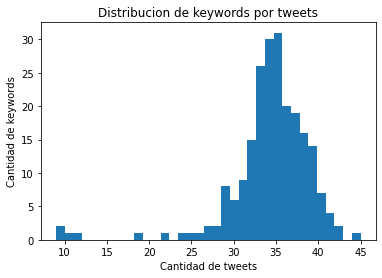

In [36]:
keyword_grouped=tweets.groupby(['keyword']).agg({'target':['mean','count']})

keyword_grouped[('target','count')].plot(kind='hist', bins=35)
plt.xlabel('Cantidad de tweets')
plt.ylabel('Cantidad de keywords')
plt.title('Distribucion de keywords por tweets')

In [37]:
keyword_grouped[('target','mean')].nsmallest(10)


keyword
aftershock     0.000000
body%20bags    0.024390
ruin           0.027027
blazing        0.029412
body%20bag     0.030303
electrocute    0.031250
screaming      0.055556
traumatised    0.057143
blew%20up      0.060606
panicking      0.060606
Name: (target, mean), dtype: float64

In [38]:
keyword_grouped[('target','mean')].nlargest(10)

keyword
debris               1.000000
derailment           1.000000
wreckage             1.000000
outbreak             0.975000
oil%20spill          0.973684
typhoon              0.973684
suicide%20bombing    0.969697
suicide%20bomber     0.967742
bombing              0.931034
rescuers             0.914286
Name: (target, mean), dtype: float64

In [40]:
tweets.dropna(inplace=True,subset=['keyword'])    
#Muestro los tweets que contienen 'aftershock'
tweets[tweets['keyword'].str.contains("aftershock")]

,id,keyword,location,text,target
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
103,149,aftershock,304,'The man who can drive himself further once th...,0
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...,0
105,153,aftershock,304,'There is no victory at bargain basement price...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles...,0
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that...,0
109,159,aftershock,304,'The harder the conflict the more glorious the...,0
110,160,aftershock,NaN,#GrowingUpSpoiled going clay pigeon shooting a...,0
111,161,aftershock,Somewhere Only We Know ?,So i guess no one actually wants any free Afte...,0


In [41]:
tweets[tweets['keyword'].str.contains("quarantine")].mean()

id        7846.281690
target       0.267606
dtype: float64